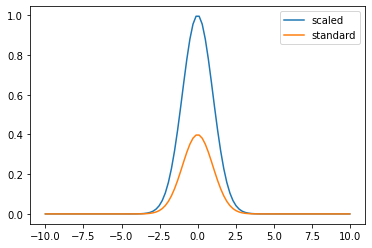

In [70]:
import numpy as np 
from math import exp, sqrt, pi
import matplotlib.pyplot as plt 

standardGaussian = lambda x : exp(-(1/2)*((x)**2))/(sqrt(2*pi))
scaledGaussian = lambda x : exp(-(1/2)*(x**2))

x = np.linspace(-10,10 , num=100)
scaled_y = [scaledGaussian(x_) for x_ in x]
standard_y = [standardGaussian(x_) for x_ in x]
plt.plot(x,scaled_y , label = 'scaled')
plt.plot(x, standard_y, label='standard')
plt.legend()


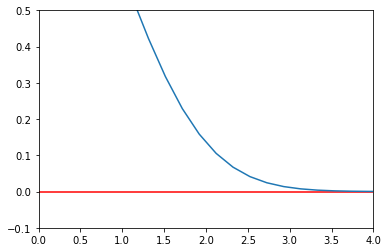

In [76]:
plt.xlim(0,4)
plt.ylim(-0.1, 0.5)
plt.axhline(color = 'red')
plt.plot(x,scaled_y , label = 'scaled')

1.5697398940101266
Mean of prob : 97.5220947265625


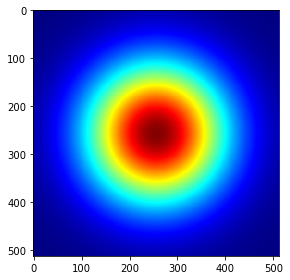

In [1]:
import cv2 
from skimage import io 
import timeit 
import numpy as np 
from math import exp, sqrt, pi
import matplotlib.pyplot as plt 

#Gaussian density function 
standardGaussian = lambda x : exp(-(1/2)*((x)**2))/(sqrt(2*pi))
scaledGaussian = lambda x : exp(-(1/2)*(x**2))

#parameter
#thred 2.5~4 
img_size = 512
center = img_size/2
thred = 3.5

#l2 norm 
def l2_norm_(x1, x2=np.array([img_size/2 , img_size/2])):
    return np.linalg.norm(x1-x2)

#vectorize 
vec_standardGaussian = np.vectorize(standardGaussian)
vec_scaledGaussian = np.vectorize(scaledGaussian)
    
start_time = timeit.default_timer()

#GrayScale Image generation -> data type uint8 
isotropic_Gray_Image = np.zeros((img_size, img_size), np.float32)
for x in range(img_size):
    for y in range(img_size):
       isotropic_Gray_Image[x][y] = np.linalg.norm(np.array([x-center , y-center]))


isotropic_Gray_Image /= np.max(isotropic_Gray_Image)
isotropic_Gray_Image *= thred


sample = vec_scaledGaussian(isotropic_Gray_Image)
np.save('/root/craft_re/sample_image/gaussian_heatmap/sample_heatmap.npy' , sample)

GM = vec_scaledGaussian(isotropic_Gray_Image)*255
GM = GM.astype(np.uint8)
GM = cv2.applyColorMap(GM,cv2.COLORMAP_JET)

#cv2 : BGR, plt : RGB -> 조심조심 
GM = cv2.cvtColor(GM, cv2.COLOR_BGR2RGB)


terminate_time = timeit.default_timer()

print(terminate_time - start_time)
print('Mean of prob : {}'.format(np.mean(GM.flatten())))

#sample heatmap 
#io.imsave('/root/craft_re/sample_image/gaussian_heatmap/sample_heatmap.jpg' , GM)
io.imshow(GM)



6.709985947993118
Mean of prob : 62.00636672973633


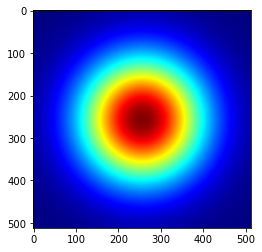

In [7]:
import cv2
import numpy as np
from math import exp

scaledGaussian = lambda x : exp(-(1/2)*(x**2))


imgSize = 512
thred_ = 2.5
isotropicGrayscaleImage = np.zeros((imgSize,imgSize),np.uint8)

s = timeit.default_timer()

for i in range(imgSize):
  for j in range(imgSize):

    distanceFromCenter = np.linalg.norm(np.array([i-imgSize/2,j-imgSize/2]))
    distanceFromCenter = thred_*distanceFromCenter/(imgSize/2)
    scaledGaussianProb = scaledGaussian(distanceFromCenter)
    isotropicGrayscaleImage[i,j] = np.clip(scaledGaussianProb*255,0,255)
    #isotropicGrayscaleImage[i,j] = scaledGaussianProb 
t = timeit.default_timer()


# Convert Grayscale to HeatMap Using Opencv
isotropicGaussianHeatmapImage = cv2.applyColorMap(isotropicGrayscaleImage,cv2.COLORMAP_JET)
isotropicGaussianHeatmapImage = cv2.cvtColor(isotropicGaussianHeatmapImage, cv2.COLOR_BGR2RGB)


print(t-s)
print('Mean of prob : {}'.format(np.mean(isotropicGrayscaleImage.flatten())))
plt.imshow(isotropicGaussianHeatmapImage)